In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [13]:
data=pd.read_excel('/data.xlsx',sheet_name='Sheet2')
data=data.sort_values('Marg Cost ($/MWh)')
data['Cumulative Capacity (MW)']=data['Capacity (MW)'].cumsum()

In [14]:
resources_dic={'H':'Hydro','N':'Nuclear','C':'Coal','G':'Natural Gas','O':'Oil'}

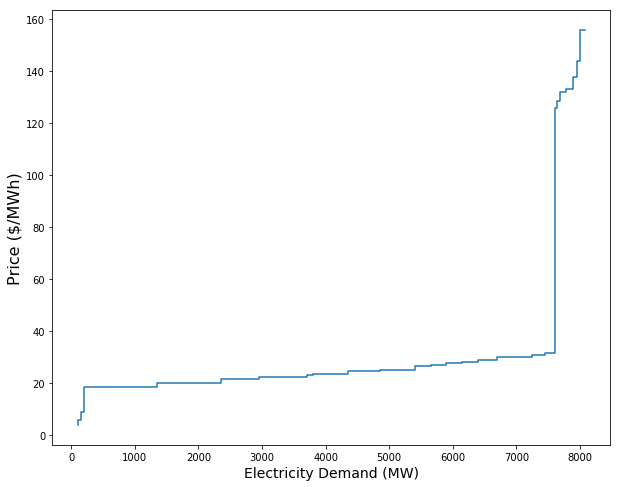

In [15]:
fig=figure(figsize=[10,8])
plt.xlabel('Electricity Demand (MW)',fontsize=14)
plt.ylabel('Price ($/MWh)', fontsize=16)
plt.step(data['Cumulative Capacity (MW)'].values, data['Marg Cost ($/MWh)'].values,where='pre') # post or middle

In [16]:
n=len(data)
def clear(Clear_num,data):
    data.loc[n]=[np.nan,np.nan,np.nan,Clear_num]
    data_clear=data.sort_values('Cumulative Capacity (MW)',axis=0)
    data_clear=data_clear.fillna(method='bfill')
    
    mkt_clear=data_clear.loc[data_clear['Cumulative Capacity (MW)']==Clear_num]
    Generator=mkt_clear.iloc[0,0]
    Price=mkt_clear.iloc[0,2]
    Resource=resources_dic[Generator[0]]
    
    print("The market clear price is: ", round(Price,2), "($/MWh)")
    print("The final generator is: ", Generator)
    print("The final generating resource is: ", Resource)

##### I didn't consider the situation when demand equals exactly to the cumulative capacity of generator. In this case, market price should be slightly higher than function result. The final generator should also include another generator other than function result.

In [18]:
# User can now provide a specific demand and clear the market
# If market information changes, please change source data

# data=pd.read_excel('/data.xlsx',sheet_name='Sheet2')
# data=data.sort_values('Marg Cost ($/MWh)')
# data['Cumulative Capacity (MW)']=data['Capacity (MW)'].cumsum()

Clear_num=6050
clear(Clear_num,data)

The market clear price is:  28.0 ($/MWh)
The final generator is:  C5
The final generating resource is:  Coal


In [19]:
# Now assume hydro units offline
data=pd.read_excel('/data.xlsx',sheet_name='Sheet2')
data=data.sort_values('Marg Cost ($/MWh)')
data_summer=data[~data.Name.str.contains("H")]
data_summer['Cumulative Capacity (MW)']=data_summer['Capacity (MW)'].cumsum()

Clear_num=7786
clear(Clear_num, data_summer)

The market clear price is:  143.88 ($/MWh)
The final generator is:  O6
The final generating resource is:  Oil


C:\Users\Ruosh\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Ruosh\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,'Electricity demand and price in a competitive market')

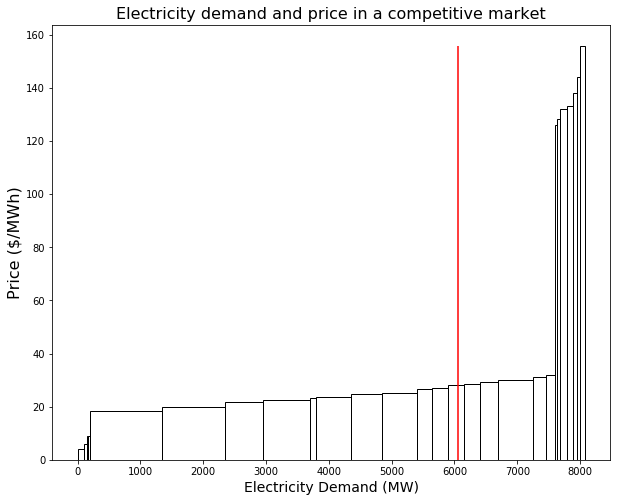

In [23]:
# suppose demand is Clear_num

# data=pd.read_excel('/data.xlsx',sheet_name='Sheet2')
# data=data.sort_values('Marg Cost ($/MWh)')
# data['Cumulative Capacity (MW)']=data['Capacity (MW)'].cumsum()

Clear_num=6050

Demand=data['Cumulative Capacity (MW)'].values
Price=data['Marg Cost ($/MWh)'].values
d_capacity=data['Capacity (MW)'].values

width=d_capacity

fig2=figure(figsize=[10,8])
B1=plt.bar(Demand-width/2,Price,width,color='#FFFFFF',edgecolor='#000000')
plt.vlines(Clear_num,ymin=0,ymax=max(Price), color='red', linestyles='solid')

plt.xlabel('Electricity Demand (MW)',fontsize=14)
plt.ylabel('Price ($/MWh)', fontsize=16)
plt.title('Electricity demand and price in a competitive market',fontsize=16)